http://ned.ipac.caltech.edu/level5/March19/Baron/Baron2.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # statistical data visualization

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [2]:
# Using this to be able to plot spectra. For some reason Jupyter won't let me plot spectra without this
%matplotlib inline

## Create our own labels:
    - Random empty spot as noise
    
## Use entire spectrum and not encoded.

* Extracted entire noise spectrum. 

* Combine the high confidence and noise array. Here are the labels for it. 

### Ultimately, we want the ML algorithm to be able to pick out high-z sources from noise!

In [3]:
# loading in the decoded sources I got from inputting random encoded sources into t-sne.
# These will be our testing sample
random_highz_sources = np.load("highz_sources.npy")

In [4]:
# loading in my high confidence high z sources.
high_confidence_highz_spectra = np.load("high_confidence_highz_1000.npy", allow_pickle = True)

In [5]:
# loading in the noise sample.
noise_sample = np.load("noise_sample_1000.npy", allow_pickle = True)

In [6]:
noise_sample

array([[-0.27453507, -0.27376958, -0.27300397, ...,  0.05124273,
         0.05123827,  0.05123386],
       [ 0.107195  ,  0.10851217,  0.10982789, ...,  0.14232644,
         0.14230387,  0.14228151],
       [-0.06730778, -0.06700857, -0.06670939, ..., -0.06052472,
        -0.06053803, -0.06055122],
       ...,
       [-0.55389851, -0.55327332, -0.5526465 , ...,  0.04016945,
         0.04015587,  0.04014242],
       [ 0.19034464,  0.18940234,  0.18845793, ...,  0.48314523,
         0.48315916,  0.48317293],
       [ 1.20482559,  1.20504015,  1.2052516 , ...,  0.24669444,
         0.2467046 ,  0.24671464]])

In [7]:
df = pd.DataFrame(columns=[1, 2])
#df[1] = df[1].astype(object)
for i in range(1000):
    df.loc[i, 1] = noise_sample[i]
    df.loc[i, 2] = high_confidence_highz_spectra[i]
df

,1,2
0,"[-0.2745350651090622, -0.2737695754367118, -0....","[0.41081295627938086, 0.41056771447626034, 0.4..."
1,"[0.10719499983231176, 0.10851217425876615, 0.1...","[1.2038720574260438, 1.2035965089283491, 1.203..."
2,"[-0.06730778183374654, -0.06700857341262742, -...","[-0.3846966864195164, -0.383299771206096, -0.3..."
3,"[0.26524069710086234, 0.2641567780718815, 0.26...","[0.30983761383520153, 0.3103446243530814, 0.31..."
4,"[0.22173403554036744, 0.22058522042018333, 0.2...","[0.9560510273906166, 0.9591930732620303, 0.962..."
...,...,...
995,"[-0.9745579263840072, -0.9743290107782245, -0....","[0.03439495327132092, 0.03404298865517989, 0.0..."
996,"[0.651170647027954, 0.6509386707244421, 0.6507...","[0.026277668678197825, 0.02663091187239326, 0...."
997,"[-0.5538985072952052, -0.5532733222073725, -0....","[-0.3130105874134315, -0.31306856269327893, -0..."
998,"[0.19034463588101694, 0.1894023417498457, 0.18...","[1.001519775442492, 1.001469975314998, 1.00141..."


In [8]:
df.columns = ["noise", "confident-highz"]

In [9]:
df['confident-highz']

0      [0.41081295627938086, 0.41056771447626034, 0.4...
1      [1.2038720574260438, 1.2035965089283491, 1.203...
2      [-0.3846966864195164, -0.383299771206096, -0.3...
3      [0.30983761383520153, 0.3103446243530814, 0.31...
4      [0.9560510273906166, 0.9591930732620303, 0.962...
                             ...                        
995    [0.03439495327132092, 0.03404298865517989, 0.0...
996    [0.026277668678197825, 0.02663091187239326, 0....
997    [-0.3130105874134315, -0.31306856269327893, -0...
998    [1.001519775442492, 1.001469975314998, 1.00141...
999    [-0.17162231379271262, -0.1709112045033402, -0...
Name: confident-highz, Length: 1000, dtype: object

## Random-Forest classification

https://levelup.gitconnected.com/random-forest-regression-209c0f354c84#:~:text=Random%20Forest%20Regression%20is%20a%20supervised%20learning%20algorithm%20that%20uses,prediction%20than%20a%20single%20model.

https://www.datacamp.com/tutorial/random-forests-classifier-python

## According to internet, issues with overfitting! Possibly need more data.

https://stackoverflow.com/questions/62445343/randomforestregressor-in-sklearn-giving-negative-scores

In [10]:
twodspectra = np.concatenate((high_confidence_highz_spectra, noise_sample))

In [11]:
highz_classification = np.ones(1000)
noise_classification = np.zeros(1000)

merge_classification = np.append(highz_classification, noise_classification)

### Make my own labels:
https://towardsdatascience.com/labeling-data-with-pandas-9e573ce59c42

In [12]:
X = twodspectra
y = merge_classification

In [13]:
# Splitting arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
# i.e. 70 % training dataset and 30 % test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [14]:

# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier

In [15]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)  

In [16]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

In [18]:
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.6933333333333334


In [19]:
clf.predict(X_test[0].reshape(1, -1))

array([1.])

In [20]:
clf.predict(X_test[1].reshape(1, -1))

array([1.])

In [21]:
y_test[0]

1.0

In [22]:
y_test[1]

1.0

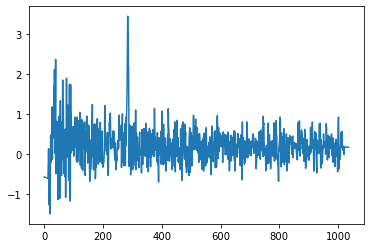

In [23]:
plt.plot(X_test[0])

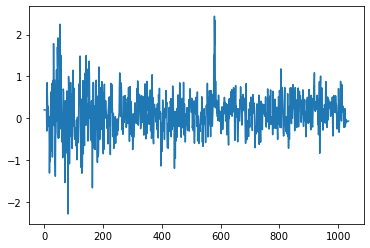

In [24]:
plt.plot(X_test[1])

Idk how much this would help but i recall that certain algorithms do better when the data is normalized. Maybe we can try implementing that and see how it does.
I think sklearn has some standard scaler that normalizes the data in a way to be used for ML purposes
white_check_mark
eyes
raised_hands





11:14
We can also look into the documentations and see what parameters we think has a big impact on the classification
11:15
and tweak those one at a time to see which has the biggest impact

In [25]:
from sklearn import tree
import dtreeviz # will be used for tree visualization

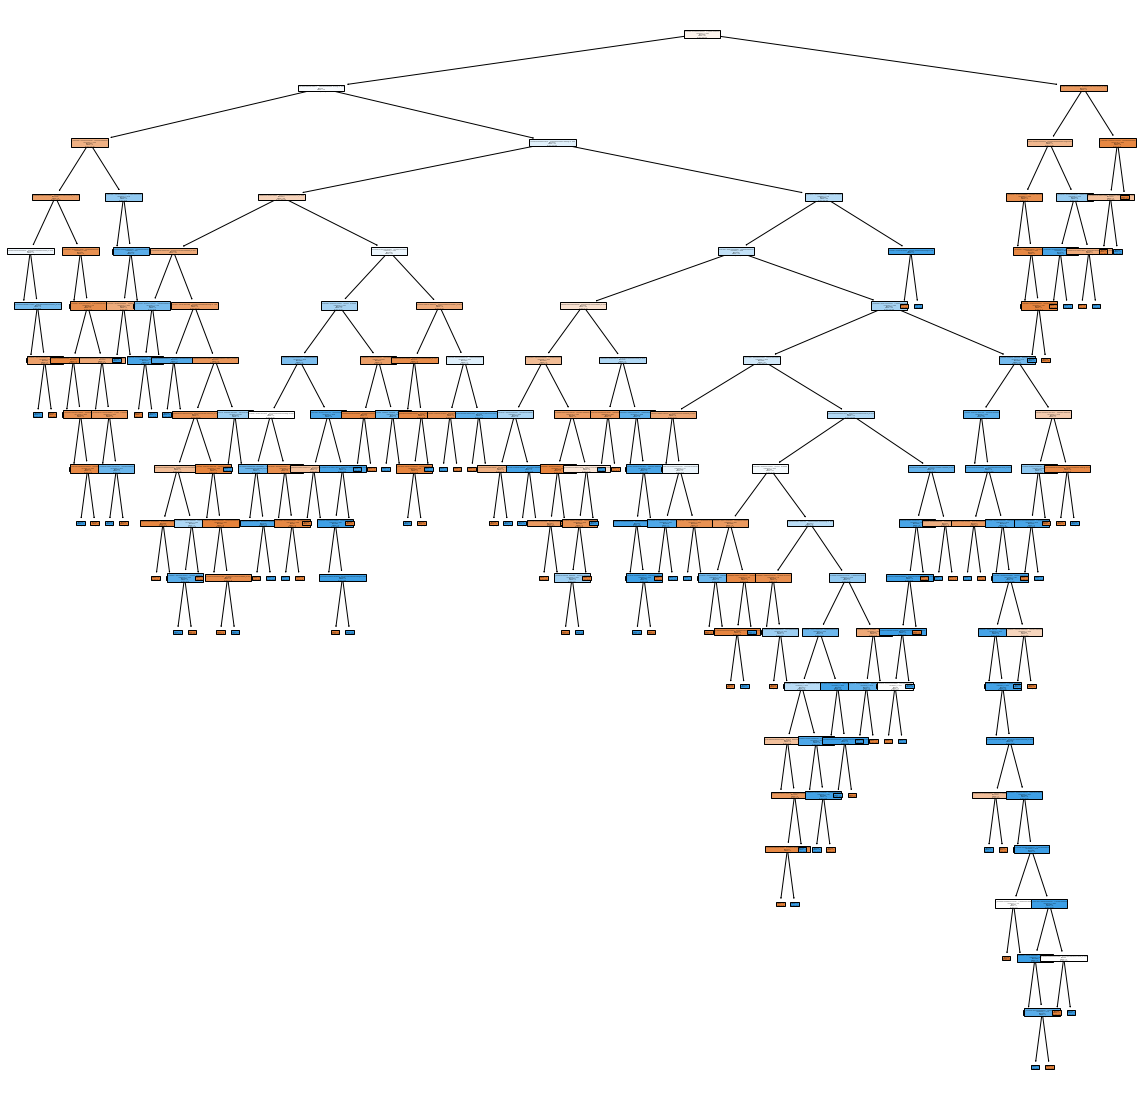

In [26]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf.estimators_[0], feature_names=X, filled=True)

In [27]:
rf = RandomForestClassifier(n_estimators=100, max_depth=3)
rf.fit(X, y)

RandomForestClassifier(max_depth=3)

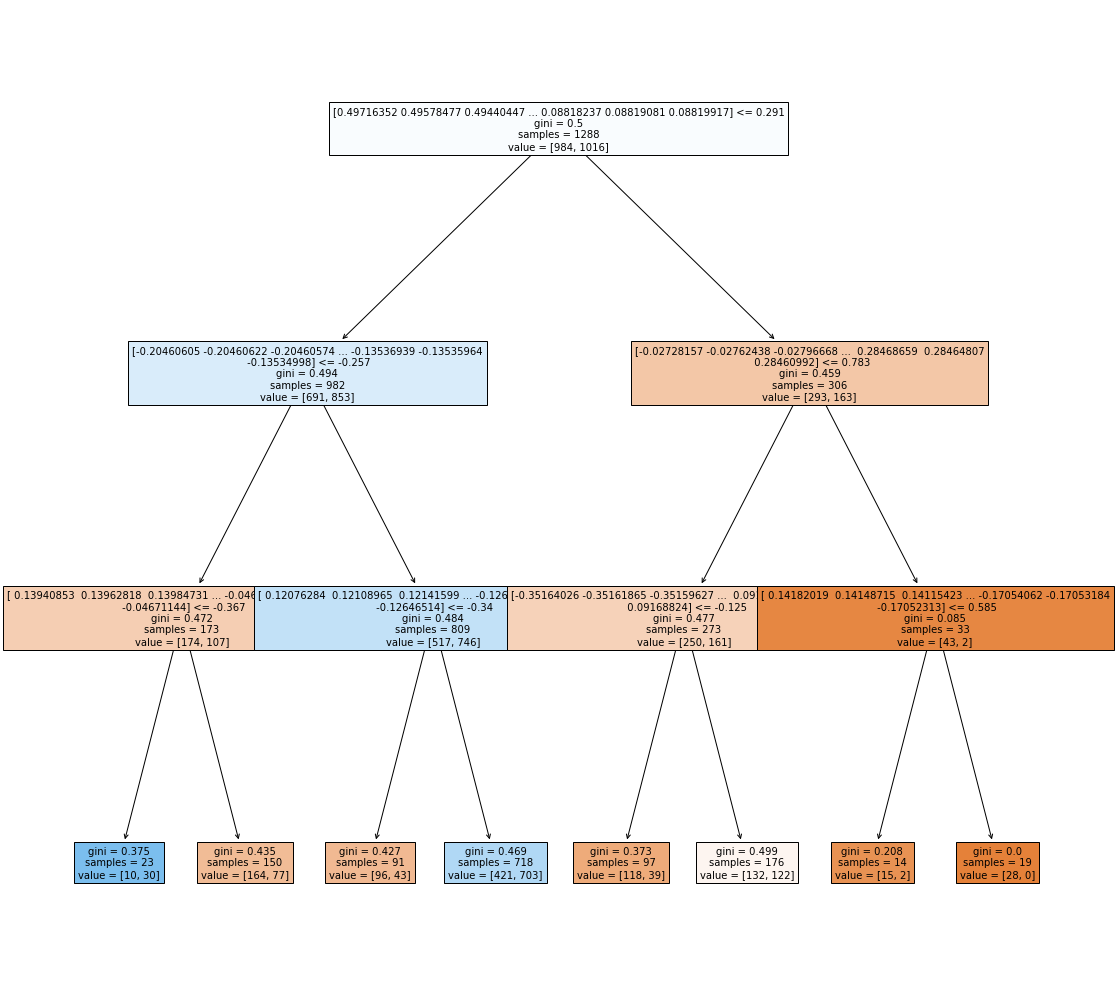

In [36]:
plt.figure(figsize=(18,18))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X, filled=True, fontsize = 10)

In [29]:
viz = dtreeviz.model(rf.estimators_[0], X, y, feature_names=X, target_name="Target")

In [30]:
viz.view() 

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

[Text(0.5, 0.875, 'X[1017] <= 0.291\ngini = 0.5\nsamples = 1288\nvalue = [984, 1016]\nclass = noise'),
 Text(0.25, 0.625, 'X[497] <= -0.257\ngini = 0.494\nsamples = 982\nvalue = [691, 853]\nclass = noise'),
 Text(0.125, 0.375, 'X[514] <= -0.367\ngini = 0.472\nsamples = 173\nvalue = [174, 107]\nclass = highz'),
 Text(0.0625, 0.125, 'gini = 0.375\nsamples = 23\nvalue = [10, 30]\nclass = noise'),
 Text(0.1875, 0.125, 'gini = 0.435\nsamples = 150\nvalue = [164, 77]\nclass = highz'),
 Text(0.375, 0.375, 'X[984] <= -0.34\ngini = 0.484\nsamples = 809\nvalue = [517, 746]\nclass = noise'),
 Text(0.3125, 0.125, 'gini = 0.427\nsamples = 91\nvalue = [96, 43]\nclass = highz'),
 Text(0.4375, 0.125, 'gini = 0.469\nsamples = 718\nvalue = [421, 703]\nclass = noise'),
 Text(0.75, 0.625, 'X[752] <= 0.783\ngini = 0.459\nsamples = 306\nvalue = [293, 163]\nclass = highz'),
 Text(0.625, 0.375, 'X[227] <= -0.125\ngini = 0.477\nsamples = 273\nvalue = [250, 161]\nclass = highz'),
 Text(0.5625, 0.125, 'gini = 0.

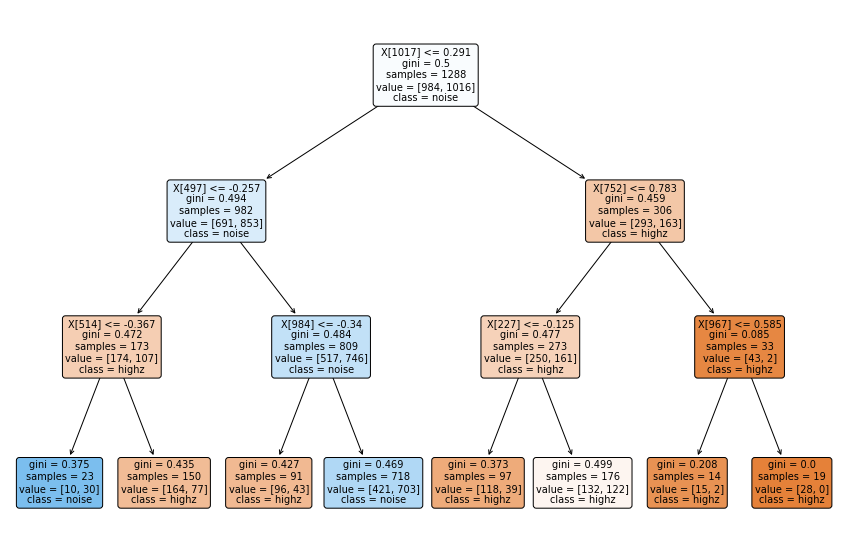

In [41]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[0],
          class_names=["highz", "noise"], 
          filled=True, impurity=True, 
          rounded=True)

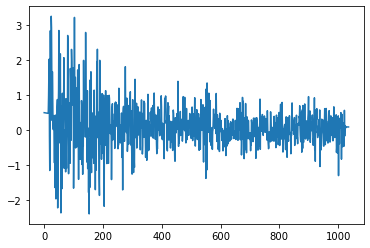

In [40]:
plt.plot(X[1017])

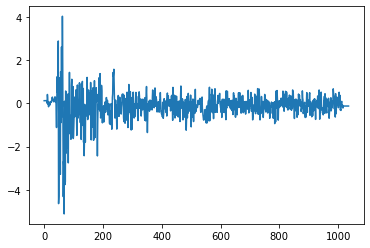

In [47]:
plt.plot(X[984])

## Plotting
https://garg-mohit851.medium.com/random-forest-visualization-3f76cdf6456f 

https://builtin.com/data-science/random-forest-python-deep-dive

https://vitalflux.com/random-forest-classifier-python-code-example/

https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

#GRIDSEARCHCV
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html